In [28]:
import pandas as pd
import numpy as np
import sqlite3 
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

In [29]:
df= pd.read_csv("bom.movie_gross.csv.gz", index_col=False)
#df.iloc[1:10]
df.head(20) 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000,2010
6,Iron Man 2,Par.,312400000.00,311500000,2010
7,Tangled,BV,200800000.00,391000000,2010
8,Despicable Me,Uni.,251500000.00,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.00,277300000,2010


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
df["foreign_gross"] = pd.to_numeric(df["foreign_gross"], errors='coerce')
df["foreign_gross"].fillna(0)

0      652000000.00
1      691300000.00
2      664300000.00
3      535700000.00
4      513900000.00
           ...     
3382           0.00
3383           0.00
3384           0.00
3385           0.00
3386           0.00
Name: foreign_gross, Length: 3387, dtype: float64

In [32]:
df["total"] = df["foreign_gross"] + df["domestic_gross"].fillna(0)
df["foreign_gross"] = df["foreign_gross"].fillna(0)
df["total"] = df["total"].fillna(0)

In [33]:
#df.sort_values(by=["total"], inplace = True, ascending = False)
df.tail(20)
#find the top 100 movies and which studios are most pervalent seperate it by domestic vs gross and the ones
#recommendation # 1 - find the studios that perform best and are statstically above 100. then seperate their domestic vs foreign gross income.

,title,studio,domestic_gross,foreign_gross,year,total
3367,Elliot: The Littlest Reindeer,Scre.,24300.00,0.00,2018,0.00
3368,The Workshop,Strand,22100.00,0.00,2018,0.00
3369,Loving Pablo,Uni.,22000.00,0.00,2018,0.00
3370,A Paris Education,KL,21600.00,0.00,2018,0.00
3371,Tag Along: The Devil Fish,CL,20700.00,0.00,2018,0.00
3372,Gabriel and the Mountain,Strand,18400.00,0.00,2018,0.00
3373,Marlina the Murderer in Four Acts,Icar.,17800.00,0.00,2018,0.00
3374,The Escape,IFC,14000.00,0.00,2018,0.00
3375,How Victor 'The Garlic' Took Alexey 'The Stud'...,CARUSEL,13000.00,0.00,2018,0.00
3376,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.00,0.00,2018,0.00


In [34]:


#$dz=df["total"]
#dz.info()
#get ready to merge tables 

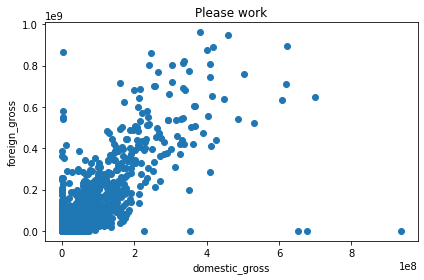

In [35]:
fig, ax = plt.subplots()
ax.scatter(df['domestic_gross'], df['foreign_gross'])
ax.set_xlabel('domestic_gross')
ax.set_ylabel('foreign_gross')
ax.set_title('Please work')

plt.tight_layout()

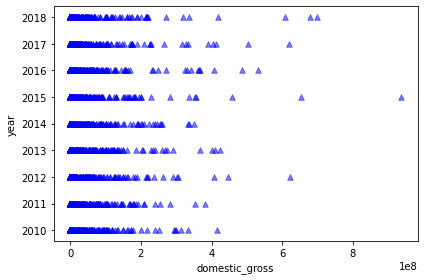

In [36]:
fig, ax = plt.subplots()

ax.scatter(x=df['domestic_gross'], y=df['year'],
            c= "#0000ff",
            alpha=0.5,
            s=30,
            marker='^')

ax.set_xlabel('domestic_gross')
ax.set_ylabel('year')

plt.tight_layout()

In [37]:
df

,title,studio,domestic_gross,foreign_gross,year,total
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010,1025500000.00
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010,960300000.00
3,Inception,WB,292600000.00,535700000.00,2010,828300000.00
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018,0.00
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018,0.00
3384,El Pacto,Sony,2500.00,0.00,2018,0.00
3385,The Swan,Synergetic,2400.00,0.00,2018,0.00


In [38]:
df.groupby('studio')

In [39]:
df.groupby('year').count()

,title,studio,domestic_gross,foreign_gross,total
year,,,,,
2010,328,327,323,328,328
2011,399,398,397,399,399
2012,400,399,393,400,400
2013,350,350,345,350,350
2014,395,394,391,395,395
2015,450,450,449,450,450
2016,436,436,433,436,436
2017,321,320,320,321,321
2018,308,308,308,308,308


In [ ]:
z["title"].plot(kind="barh")
plt.title("Most Heavily Critized Genres of Movies")
plt.ylabel("Type of Genres")
plt.xlabel("Total number of produced films 2010-2019")

plt.show()